In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/Crop_Recommendation.csv")

In [3]:
df.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice


In [4]:
df.shape

(2200, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   Phosphorus   2200 non-null   int64  
 2   Potassium    2200 non-null   int64  
 3   Temperature  2200 non-null   float64
 4   Humidity     2200 non-null   float64
 5   pH_Value     2200 non-null   float64
 6   Rainfall     2200 non-null   float64
 7   Crop         2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [6]:
for column in df.select_dtypes(include=['number']).columns:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        lower_range = q1 - 1.5 * iqr
        upper_range = q3 + 1.5 * iqr
        print('Outlier in ' +column+  ' ' , df[(df[column] < lower_range) | (df[column] > upper_range)].shape[0])

Outlier in Nitrogen  0
Outlier in Phosphorus  138
Outlier in Potassium  200
Outlier in Temperature  86
Outlier in Humidity  30
Outlier in pH_Value  57
Outlier in Rainfall  100


In [7]:
def outliersDetect(df):
    for column in df.select_dtypes(include=['number']).columns:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        lower_range = q1 - 1.5 * iqr
        upper_range = q3 + 1.5 * iqr
        outliers_in_column = df[(df[column] > lower_range) & (df[column] < upper_range)]

    return outliers_in_column

df_cleaned = outliersDetect(df)

In [8]:
df_cleaned.shape

(2100, 8)

In [9]:
ph_stats = df_cleaned.groupby('Crop')['pH_Value'].agg(['max', 'min']).reset_index()

print(ph_stats)

           Crop       max       min
0         Apple  6.499227  5.514253
1        Banana  6.490074  5.505394
2     Blackgram  7.775306  6.500145
3      ChickPea  8.868741  5.988993
4       Coconut  6.470466  5.542169
5        Coffee  7.493192  6.020947
6        Cotton  7.994680  5.801048
7        Grapes  6.499605  5.510925
8          Jute  7.488014  6.002525
9   KidneyBeans  5.998125  5.502999
10       Lentil  7.841496  5.916454
11        Maize  6.995844  5.513698
12        Mango  6.967418  4.507524
13    MothBeans  9.935091  3.504752
14     MungBean  7.199495  6.218924
15    Muskmelon  6.781050  6.002927
16       Orange  7.995849  6.010392
17       Papaya  6.993473  6.502289
18   PigeonPeas  7.445445  4.548202
19  Pomegranate  7.199504  5.561852
20         Rice  7.524080  5.005307
21   Watermelon  6.956509  6.000976


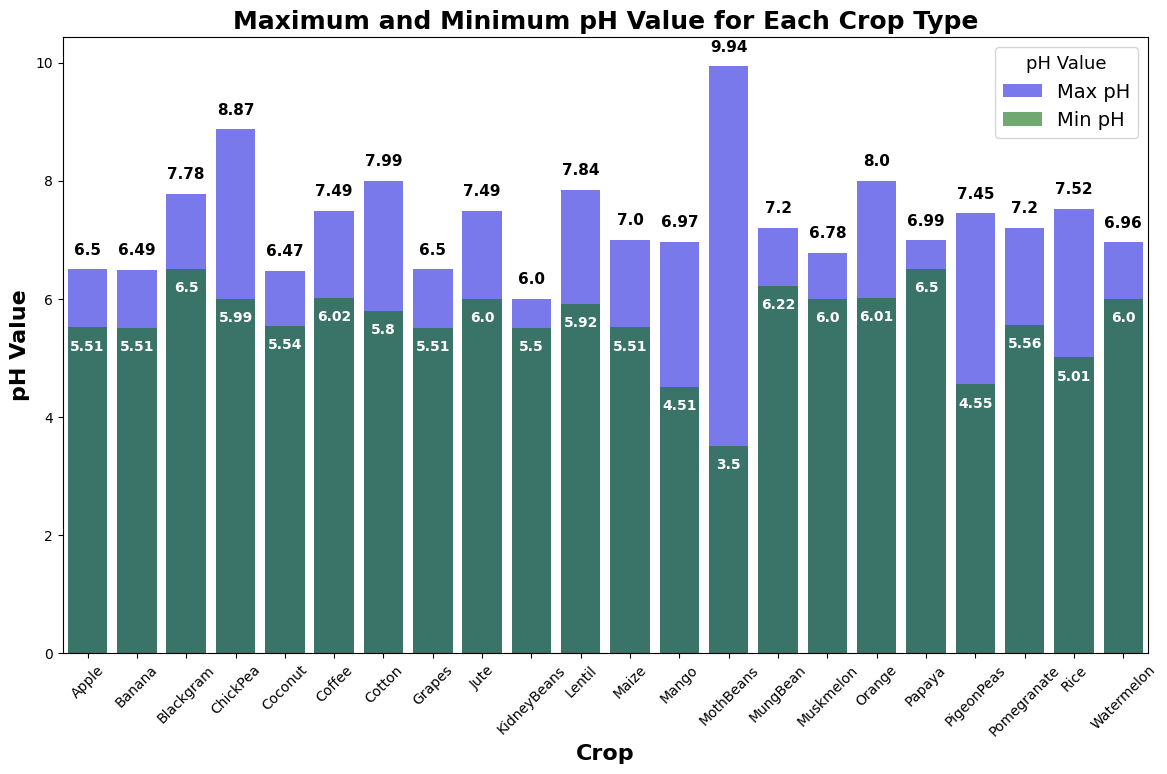

In [10]:
plt.figure(figsize=(14, 8))

# Plot max pH values
bar_max = sns.barplot(x=range(len(ph_stats)), y='max', data=ph_stats, color='b', alpha=0.6, label='Max pH')

# Annotate max pH values
for index, row in ph_stats.iterrows():
    bar_max.text(index, row['max'] + 0.2, round(row['max'], 2), color='black', ha="center", va='bottom', fontsize=11, weight='bold')

bar_min = sns.barplot(x=range(len(ph_stats)), y='min', data=ph_stats, color='green', alpha=0.6, label='Min pH')

for index, row in ph_stats.iterrows():
    bar_min.text(index, row['min'] - 0.2, round(row['min'], 2), color='white', ha="center", va='top', fontsize=10, weight='bold')

plt.title('Maximum and Minimum pH Value for Each Crop Type', fontsize=18, weight='bold')
plt.xlabel('Crop', fontsize=16, weight='bold')
plt.ylabel('pH Value', fontsize=16, weight='bold')
plt.legend(title='pH Value', fontsize=14, title_fontsize='13')

plt.xticks(ticks=range(len(ph_stats['Crop'])), labels=ph_stats['Crop'], rotation=45)

plt.show()

In [11]:
temp_stats = df_cleaned.groupby('Crop')['Temperature'].agg(['max', 'min']).reset_index()

print(temp_stats)

           Crop        max        min
0         Apple  23.996862  21.036527
1        Banana  29.908885  25.010185
2     Blackgram  34.946616  25.097374
3      ChickPea  20.995022  17.024985
4       Coconut  29.869083  25.008724
5        Coffee  27.923744  23.059519
6        Cotton  25.992374  22.000851
7        Grapes  41.948657   8.825675
8          Jute  26.985822  23.094338
9   KidneyBeans  24.923601  15.330426
10       Lentil  29.944139  18.064861
11        Maize  26.549864  18.041855
12        Mango  35.990097  27.003155
13    MothBeans  31.999286  24.018254
14     MungBean  29.914544  27.014704
15    Muskmelon  29.943492  27.024151
16       Orange  34.906653  10.010813
17       Papaya  43.675493  23.012402
18   PigeonPeas  36.977944  18.319104
19  Pomegranate  24.962732  18.071330
20         Rice  26.884449  20.045414
21   Watermelon  26.986037  24.043558


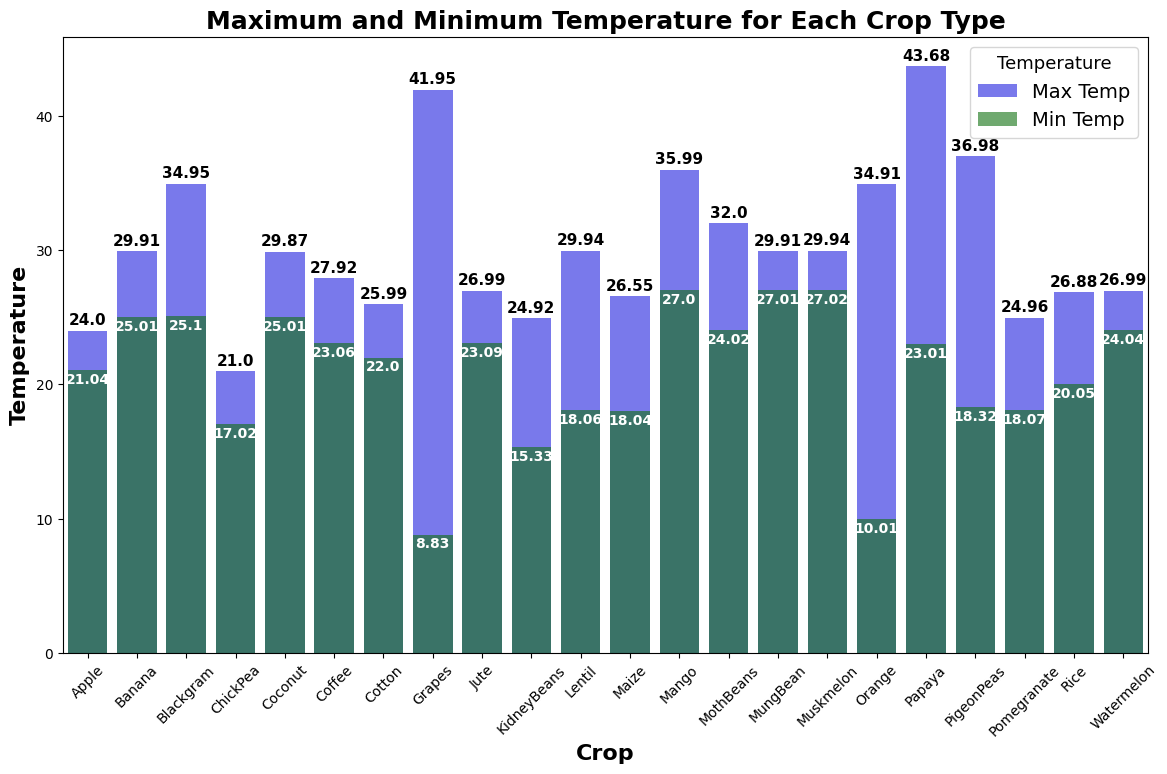

In [12]:
plt.figure(figsize=(14, 8))

bar_max = sns.barplot(x=range(len(temp_stats)), y='max', data=temp_stats, color='b', alpha=0.6, label='Max Temp')

for index, row in temp_stats.iterrows():
    bar_max.text(index, row['max'] + 0.2, round(row['max'], 2), color='black', ha="center", va='bottom', fontsize=11, weight='bold')

bar_min = sns.barplot(x=range(len(temp_stats)), y='min', data=temp_stats, color='green', alpha=0.6, label='Min Temp')

for index, row in temp_stats.iterrows():
    bar_min.text(index, row['min'] - 0.2, round(row['min'], 2), color='white', ha="center", va='top', fontsize=10, weight='bold')

plt.title('Maximum and Minimum Temperature for Each Crop Type', fontsize=18, weight='bold')
plt.xlabel('Crop', fontsize=16, weight='bold')
plt.ylabel('Temperature', fontsize=16, weight='bold')
plt.legend(title='Temperature', fontsize=14, title_fontsize='13')

plt.xticks(ticks=range(len(temp_stats['Crop'])), labels=temp_stats['Crop'], rotation=45)

plt.show()

In [13]:
rain_stats = df_cleaned.groupby('Crop')['Rainfall'].agg(['max', 'min']).reset_index()

print(rain_stats)

           Crop         max         min
0         Apple  124.983162  100.117344
1        Banana  119.847970   90.109781
2     Blackgram   74.915595   60.417903
3      ChickPea   94.781896   65.113656
4       Coconut  212.867626  131.090008
5        Coffee  199.473564  115.156401
6        Cotton   99.931008   60.653817
7        Grapes   74.915062   65.010953
8          Jute  199.836291  150.235524
9   KidneyBeans  149.744103   60.275525
10       Lentil   54.939377   35.034848
11        Maize  109.751538   60.651715
12        Mango  100.812466   89.291476
13    MothBeans   74.443307   30.920140
14     MungBean   59.872321   36.120429
15    Muskmelon   29.866814   20.211267
16       Orange  119.694658  100.173796
17       Papaya  211.852906   40.351531
18   PigeonPeas  198.829881   90.054227
19  Pomegranate  112.475094  102.518476
20         Rice  213.356092  182.561632
21   Watermelon   59.759800   40.126504


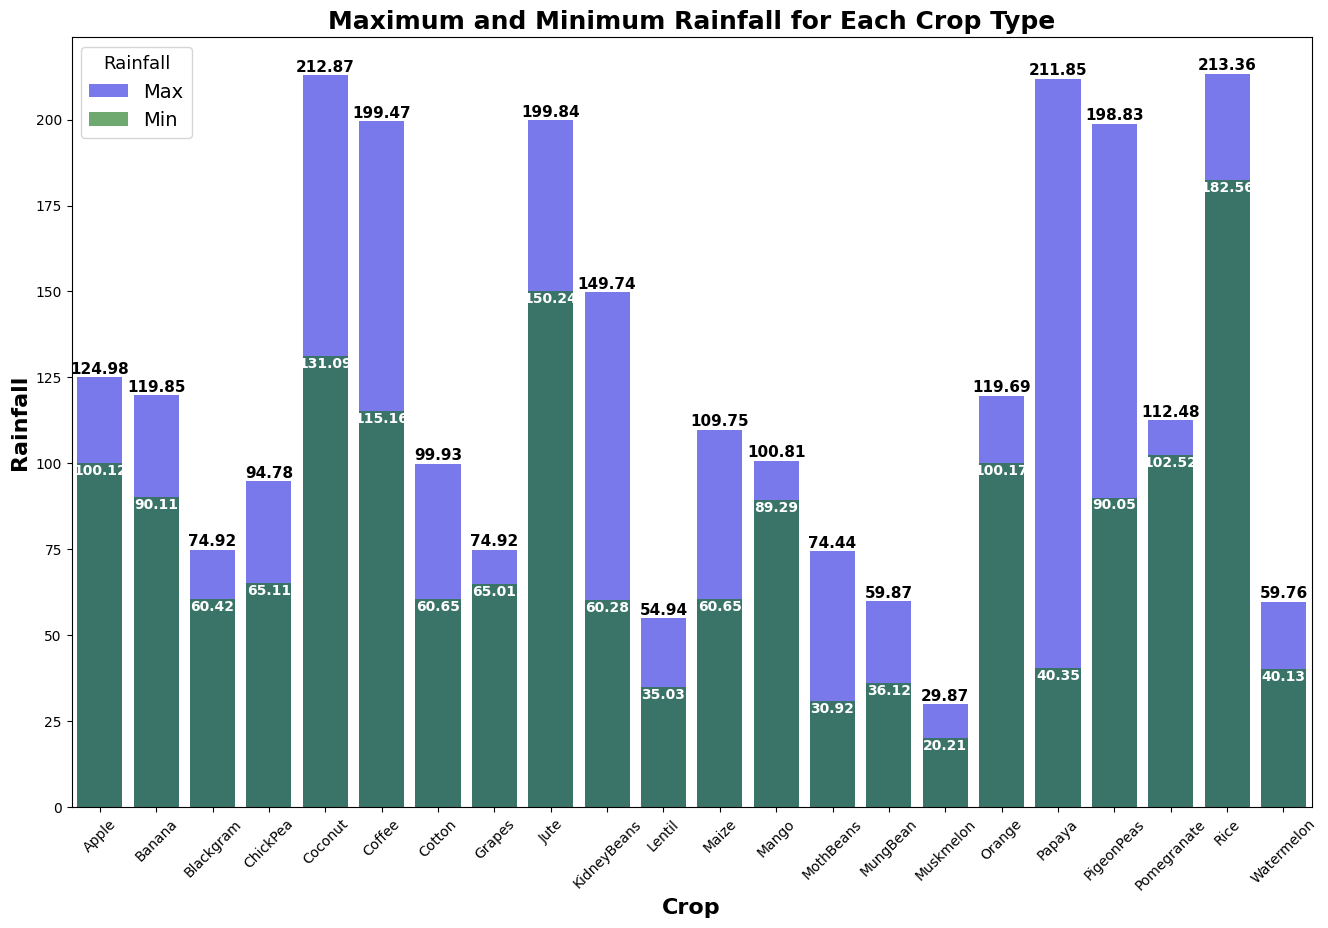

In [14]:
plt.figure(figsize=(16, 10))

bar_max = sns.barplot(x=range(len(rain_stats)), y='max', data=rain_stats, color='b', alpha=0.6, label='Max')

for index, row in rain_stats.iterrows():
    bar_max.text(index, row['max'] + 0.2, round(row['max'], 2), color='black', ha="center", va='bottom', fontsize=11, weight='bold')

bar_min = sns.barplot(x=range(len(rain_stats)), y='min', data=rain_stats, color='green', alpha=0.6, label='Min')

for index, row in rain_stats.iterrows():
    bar_min.text(index, row['min'] - 0.2, round(row['min'], 2), color='white', ha="center", va='top', fontsize=10, weight='bold')

plt.title('Maximum and Minimum Rainfall for Each Crop Type', fontsize=18, weight='bold')
plt.xlabel('Crop', fontsize=16, weight='bold')
plt.ylabel('Rainfall', fontsize=16, weight='bold')
plt.legend(title='Rainfall', fontsize=14, title_fontsize='13')

plt.xticks(ticks=range(len(rain_stats['Crop'])), labels=rain_stats['Crop'], rotation=45)

plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [16]:
X = df_cleaned.drop('Crop', axis=1)
y = df_cleaned['Crop']

scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_encoded, test_size=0.2, random_state=29)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import classification_report, accuracy_score

In [19]:
Lg_model = LogisticRegression()
Lg_model.fit(X_train,y_train)

LogisticRegression()

In [20]:
y_pred_lg = Lg_model.predict(X_test)

In [21]:
print(f"Accuracy: {accuracy_score(y_test,y_pred_lg) * 100:.2f}%")

Accuracy: 98.57%


In [22]:
print(classification_report(y_test, y_pred_lg, target_names=encoder.classes_))

              precision    recall  f1-score   support

       Apple       1.00      1.00      1.00        18
      Banana       1.00      1.00      1.00        22
   Blackgram       1.00      0.95      0.97        20
    ChickPea       1.00      1.00      1.00        22
     Coconut       1.00      1.00      1.00        15
      Coffee       1.00      1.00      1.00        22
      Cotton       0.95      1.00      0.97        18
      Grapes       1.00      1.00      1.00        25
        Jute       0.88      1.00      0.94        22
 KidneyBeans       1.00      1.00      1.00        24
      Lentil       0.95      0.95      0.95        22
       Maize       1.00      0.95      0.97        20
       Mango       1.00      1.00      1.00        17
   MothBeans       0.92      1.00      0.96        12
    MungBean       1.00      1.00      1.00        13
   Muskmelon       1.00      1.00      1.00        18
      Orange       1.00      1.00      1.00        22
      Papaya       1.00    

In [23]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

print("K-Nearest Neighbors (KNN) Model:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn) * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred_knn, target_names=encoder.classes_))

K-Nearest Neighbors (KNN) Model:
Accuracy: 97.38%
Classification Report:
              precision    recall  f1-score   support

       Apple       1.00      1.00      1.00        18
      Banana       1.00      1.00      1.00        22
   Blackgram       0.90      0.95      0.93        20
    ChickPea       1.00      1.00      1.00        22
     Coconut       1.00      1.00      1.00        15
      Coffee       1.00      1.00      1.00        22
      Cotton       0.95      1.00      0.97        18
      Grapes       1.00      1.00      1.00        25
        Jute       0.81      1.00      0.90        22
 KidneyBeans       0.92      1.00      0.96        24
      Lentil       0.95      0.95      0.95        22
       Maize       1.00      0.95      0.97        20
       Mango       1.00      1.00      1.00        17
   MothBeans       1.00      0.92      0.96        12
    MungBean       1.00      1.00      1.00        13
   Muskmelon       1.00      1.00      1.00        18
      Or

In [24]:
SV_model = SVC(kernel='linear', C=1.0)
SV_model.fit(X_train, y_train)

y_pred_sv = SV_model.predict(X_test)

print("K-Nearest Neighbors (KNN) Model:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_sv) * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred_sv, target_names=encoder.classes_))

K-Nearest Neighbors (KNN) Model:
Accuracy: 98.81%
Classification Report:
              precision    recall  f1-score   support

       Apple       1.00      1.00      1.00        18
      Banana       1.00      1.00      1.00        22
   Blackgram       0.95      1.00      0.98        20
    ChickPea       1.00      1.00      1.00        22
     Coconut       1.00      1.00      1.00        15
      Coffee       1.00      1.00      1.00        22
      Cotton       1.00      1.00      1.00        18
      Grapes       1.00      1.00      1.00        25
        Jute       0.88      1.00      0.94        22
 KidneyBeans       0.96      1.00      0.98        24
      Lentil       1.00      0.95      0.98        22
       Maize       1.00      1.00      1.00        20
       Mango       1.00      1.00      1.00        17
   MothBeans       1.00      1.00      1.00        12
    MungBean       1.00      1.00      1.00        13
   Muskmelon       1.00      1.00      1.00        18
      Or

In [25]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

y_pred_nb = nb_model.predict(X_test)

print("K-Nearest Neighbors (KNN) Model:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb) * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred_nb, target_names=encoder.classes_))

K-Nearest Neighbors (KNN) Model:
Accuracy: 99.05%
Classification Report:
              precision    recall  f1-score   support

       Apple       1.00      1.00      1.00        18
      Banana       1.00      1.00      1.00        22
   Blackgram       1.00      1.00      1.00        20
    ChickPea       1.00      1.00      1.00        22
     Coconut       1.00      1.00      1.00        15
      Coffee       1.00      1.00      1.00        22
      Cotton       1.00      1.00      1.00        18
      Grapes       1.00      1.00      1.00        25
        Jute       0.88      0.95      0.91        22
 KidneyBeans       1.00      1.00      1.00        24
      Lentil       1.00      1.00      1.00        22
       Maize       1.00      1.00      1.00        20
       Mango       1.00      1.00      1.00        17
   MothBeans       1.00      1.00      1.00        12
    MungBean       1.00      1.00      1.00        13
   Muskmelon       1.00      1.00      1.00        18
      Or

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

In [27]:
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

cnn_model = Sequential([
    Conv1D(64, 2, activation='relu', input_shape=(X_train_cnn.shape[1], X_train_cnn.shape[2])),
    MaxPooling1D(1),
    Conv1D(32, 2, activation='relu'),
    MaxPooling1D(1),
    Flatten(),
    Dense(len(encoder.classes_), activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

cnn_model.fit(X_train_cnn, y_train, epochs=10, batch_size=32, validation_data=(X_test_cnn, y_test))

loss, accuracy = cnn_model.evaluate(X_test_cnn, y_test)
print(f"Test Accuracy (CNN): {accuracy * 100:.2f}%")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.2330 - loss: 2.9385 - val_accuracy: 0.5643 - val_loss: 2.0668
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6389 - loss: 1.6827 - val_accuracy: 0.8833 - val_loss: 0.6630
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9154 - loss: 0.5285 - val_accuracy: 0.9190 - val_loss: 0.3242
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9450 - loss: 0.2787 - val_accuracy: 0.9476 - val_loss: 0.2055
Epoch 5/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9512 - loss: 0.1963 - val_accuracy: 0.9619 - val_loss: 0.1556
Epoch 6/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9681 - loss: 0.1454 - val_accuracy: 0.9714 - val_loss: 0.1283
Epoch 7/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9662 - loss: 0.1317 - val_accuracy: 0.9714 - val_loss: 0.1120
Epoch 8/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9757 - loss: 0.0984 - val_accuracy: 0.9571 - val_loss

In [28]:
y_pred_cnn = cnn_model.predict(X_test)
y_pred_classes = np.argmax(y_pred_cnn, axis=1)

print("Convolutional Neural Network (CNN) Model:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_classes) * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred_classes, target_names=encoder.classes_))

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Convolutional Neural Network (CNN) Model:
Accuracy: 98.10%
Classification Report:
              precision    recall  f1-score   support

       Apple       1.00      1.00      1.00        18
      Banana       1.00      1.00      1.00        22
   Blackgram       0.95      0.95      0.95        20
    ChickPea       1.00      1.00      1.00        22
     Coconut       1.00      1.00      1.00        15
      Coffee       1.00      1.00      1.00        22
      Cotton       1.00      1.00      1.00        18
      Grapes       1.00      1.00      1.00        25
        Jute       0.81      1.00      0.90        22
 KidneyBeans       0.96      1.00      0.98        24
      Lentil       0.95      0.95      0.95        22
       Maize       1.00      1.00      1.00        20
       Mango       1.00      1.00      1.00        17
   MothBeans       1.00      1.00      1.00        12
    MungBean       1.00      1.00      1.00        13
   Muskmelon 

In [29]:
mlp_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(len(encoder.classes_), activation='softmax')
])

mlp_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

mlp_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

loss, accuracy = mlp_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.1009 - loss: 3.0326 - val_accuracy: 0.2571 - val_loss: 2.5957
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.2890 - loss: 2.4296 - val_accuracy: 0.5310 - val_loss: 1.8305
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5936 - loss: 1.6622 - val_accuracy: 0.7881 - val_loss: 1.1434
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7952 - loss: 1.0155 - val_accuracy: 0.8857 - val_loss: 0.6905
Epoch 5/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8802 - loss: 0.6349 - val_accuracy: 0.9190 - val_loss: 0.4709
Epoch 6/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9001 - loss: 0.4594 - val_accuracy: 0.9310 - val_loss: 0.3495
Epoch 7/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9222 - loss: 0.3535 - val_accuracy: 0.9357 - val_loss: 0.2844
Epoch 8/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9339 - loss: 0.2909 - val_accuracy: 0.9452 - val_loss: 0.2411
Ep

In [30]:
y_pred_mlp = mlp_model.predict(X_test)
y_pred_classes = np.argmax(y_pred_mlp, axis=1)

print("Multi-Layer Perceptron (MLP) Model:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_classes) * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred_classes, target_names=encoder.classes_))

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Multi-Layer Perceptron (MLP) Model:
Accuracy: 95.48%
Classification Report:
              precision    recall  f1-score   support

       Apple       1.00      1.00      1.00        18
      Banana       1.00      1.00      1.00        22
   Blackgram       0.95      0.90      0.92        20
    ChickPea       1.00      1.00      1.00        22
     Coconut       1.00      1.00      1.00        15
      Coffee       1.00      1.00      1.00        22
      Cotton       0.86      1.00      0.92        18
      Grapes       1.00      1.00      1.00        25
        Jute       0.76      1.00      0.86        22
 KidneyBeans       0.92      1.00      0.96        24
      Lentil       0.91      0.95      0.93        22
       Maize       1.00      0.85      0.92        20
       Mango       1.00      1.00      1.00        17
   MothBeans       1.00      1.00      1.00        12
    MungBean       1.00      1.00      1.00        13
   Muskmelon       

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
